<a href="https://colab.research.google.com/github/shahithkumar/Unemployement-Project/blob/main/UNEMPLOYEMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Introduction**

This analysis aims to explore and understand the trends and patterns in unemployment rates across various countries. Using the dataset which includes information on countries and their respective unemployment rates, we will perform exploratory data analysis (EDA), clustering, and regression to uncover insights and predict future trends. This analysis will help in making informed decisions regarding economic policies and strategies for managing unemployment.

# **Objectives**
1.
Data Cleaning and Preparation:

2.
Exploratory Data Analysis (EDA):

3.
Visualization

4.
Clustering Analysis

5.
Deep Learning



# **1. Import Libraries**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



Mounted at /content/drive


# **2. Load Data**


In [ ]:
path="/content/drive/MyDrive/UMP 4.csv"
df_ump=pd.read_csv(path)

In [ ]:
print(df_ump.head(5))


  country_name                    indicator_name     sex age_group  \
0  Afghanistan  Unemployment rate by sex and age  Female     15-24   
1  Afghanistan  Unemployment rate by sex and age  Female       25+   
2  Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3  Afghanistan  Unemployment rate by sex and age    Male     15-24   
4  Afghanistan  Unemployment rate by sex and age    Male       25+   

  age_categories    2014    2015    2016    2017    2018    2019    2020  \
0          Youth  13.340  15.974  18.570  21.137  20.649  20.154  21.228   
1         Adults   8.576   9.014   9.463   9.920  11.223  12.587  14.079   
2       Children  10.306  11.552  12.789  14.017  14.706  15.418  16.783   
3          Youth   9.206  11.502  13.772  16.027  15.199  14.361  14.452   
4         Adults   6.463   6.879   7.301   7.728   7.833   7.961   8.732   

     2021    2022    2023    2024  
0  21.640  30.561  32.200  33.332  
1  14.415  23.818  26.192  28.298  
2  17.134  26.

# **3. Data Cleaning**


In [ ]:
a=df_ump.duplicated().sum()


In [ ]:
a

0

In [ ]:
df_ump.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1128.000000,1122.000000,1122.000000
mean,11.387800,11.272444,11.122963,10.863516,10.516499,10.311452,11.851285,11.422645,10.340361,9.985181,9.940089
std,11.119002,10.915942,10.742947,10.640980,10.527773,10.297952,11.231580,10.873412,10.264810,9.987778,9.977512
min,0.027000,0.034000,0.038000,0.035000,0.044000,0.036000,0.056000,0.064000,0.067000,0.063000,0.060000
25%,3.933500,3.993500,3.945250,3.747500,3.672750,3.538500,4.334500,4.153500,3.555250,3.477500,3.459750
50%,7.697500,7.547500,7.504500,7.140500,6.706000,6.627500,8.067500,7.542500,6.571500,6.466000,6.364000
75%,15.050750,14.766250,14.467500,14.142000,13.343000,13.285500,15.316250,14.881500,13.410000,12.914500,12.687750
max,74.485000,74.655000,74.720000,75.416000,76.395000,77.173000,83.990000,82.135000,78.776000,78.541000,78.644000


In [ ]:
df_ump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1134 non-null   object 
 1   indicator_name  1134 non-null   object 
 2   sex             1134 non-null   object 
 3   age_group       1134 non-null   object 
 4   age_categories  1134 non-null   object 
 5   2014            1134 non-null   float64
 6   2015            1134 non-null   float64
 7   2016            1134 non-null   float64
 8   2017            1134 non-null   float64
 9   2018            1134 non-null   float64
 10  2019            1134 non-null   float64
 11  2020            1134 non-null   float64
 12  2021            1134 non-null   float64
 13  2022            1128 non-null   float64
 14  2023            1122 non-null   float64
 15  2024            1122 non-null   float64
dtypes: float64(11), object(5)
memory usage: 141.9+ KB


In [ ]:
df_ump = df_ump.drop(columns=['indicator_name'], errors='ignore')


<Axes: >

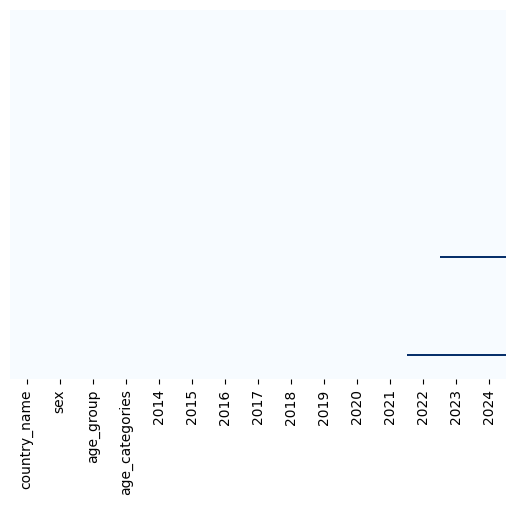

In [ ]:
sns.heatmap(df_ump.isnull(),yticklabels=False,cbar=False,cmap="Blues")


In [ ]:
df_ump.isnull().sum()

country_name       0
sex                0
age_group          0
age_categories     0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               6
2023              12
2024              12
dtype: int64

In [ ]:
pd.set_option('display.max_columns',None)


In [ ]:
df_ump['2022'].fillna(df_ump['2022'].mean(), inplace=True)
df_ump['2023'].fillna(df_ump['2023'].mean(), inplace=True)


In [ ]:
req_col = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

df_ch = df_ump[req_col]
avg_ump = df_ump[req_col].mean()


<Axes: >

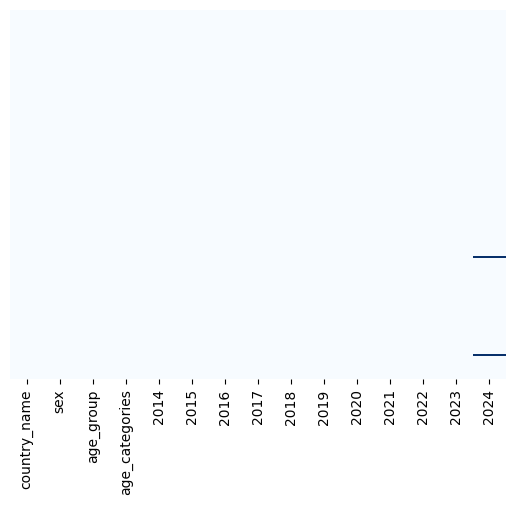

In [ ]:
sns.heatmap(df_ump.isnull(),yticklabels=False,cbar=False,cmap="Blues")


# **4.Visualization **

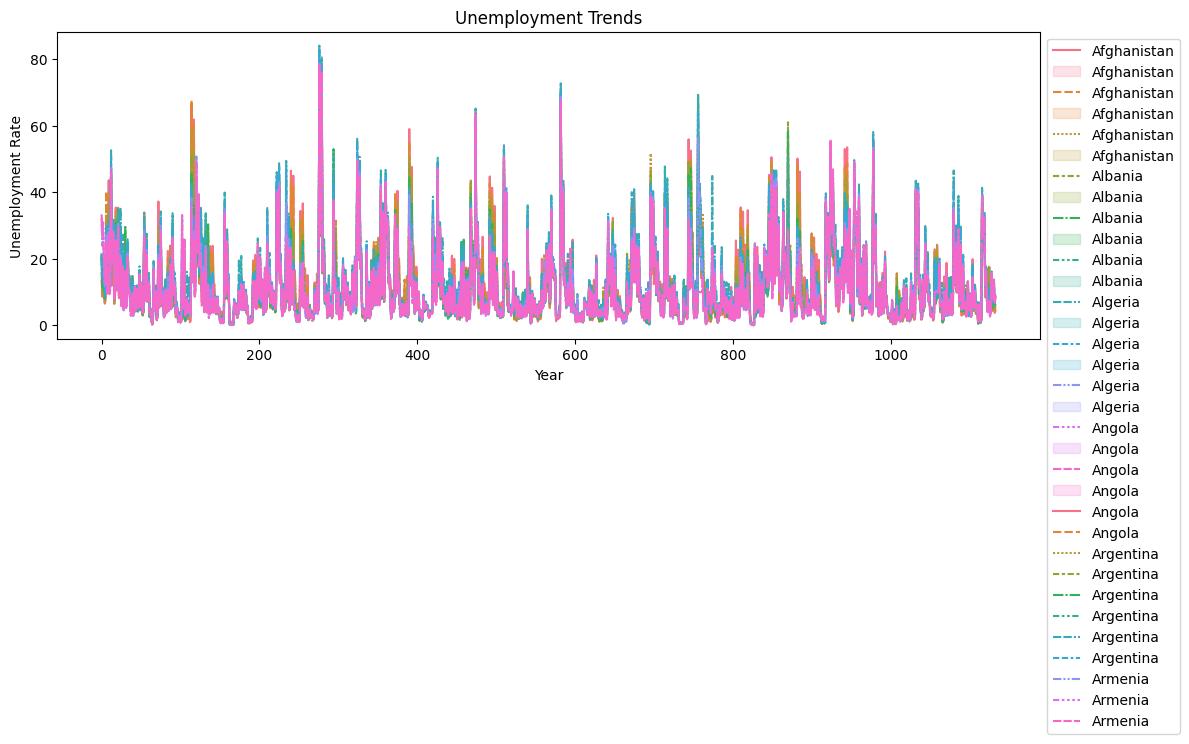

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ch)
plt.title("Unemployment Trends")
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend(df_ump['country_name'], loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()

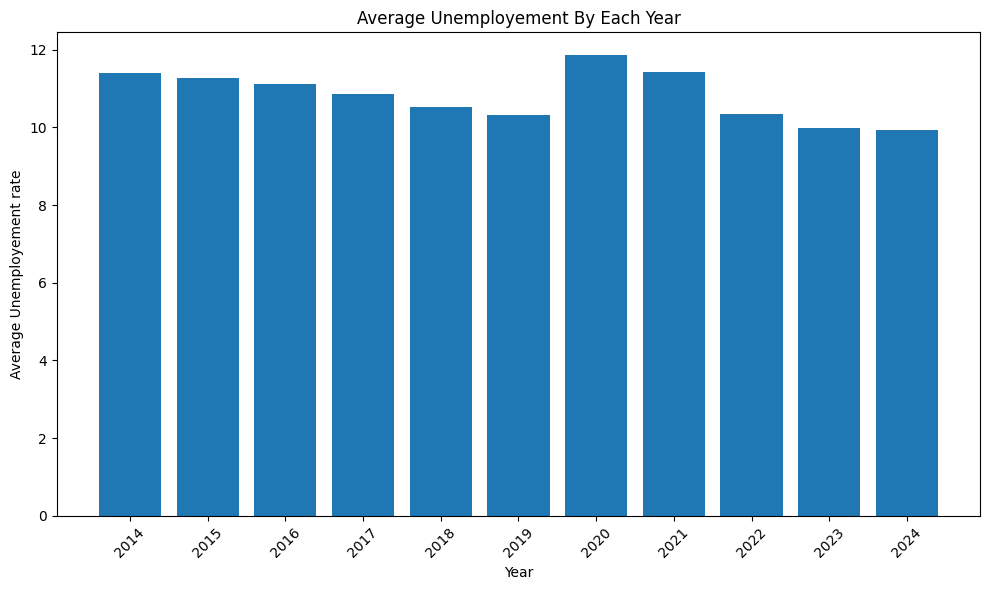

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(avg_ump.index,avg_ump.values)
plt.title("Average Unemployement By Each Year")
plt.xlabel('Year')
plt.ylabel('Average Unemployement rate')
plt.xticks(rotation=45)
plt.tight_layout()


In [ ]:
cols_for_boxplot = ['age_group', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
df_box = df_ump[cols_for_boxplot]

df_melted = df_box.melt(id_vars='age_group', var_name='Year', value_name='Unemployment Rate')


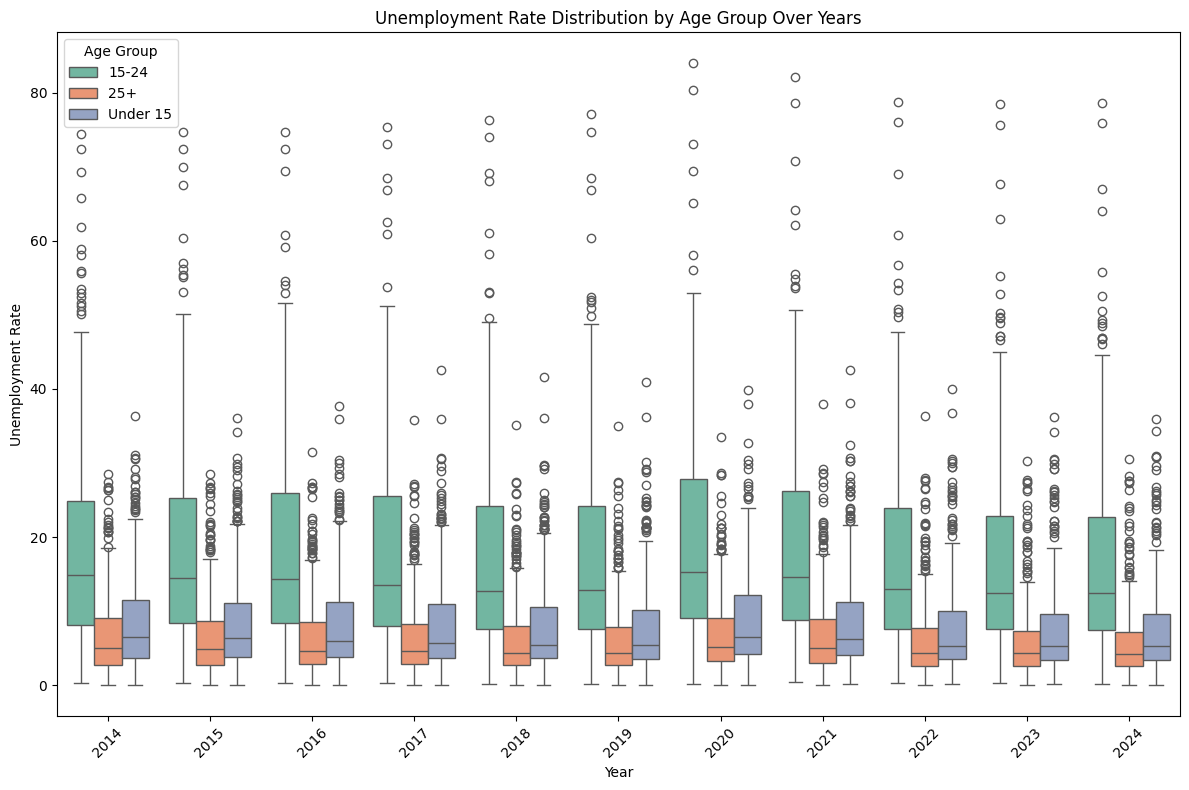

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Unemployment Rate', hue='age_group', data=df_melted, palette='Set2')
plt.title('Unemployment Rate Distribution by Age Group Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.tight_layout()


Text(0.5, 1.0, 'Pairplot of Unemployment Rates (2014-2024) by Gender')

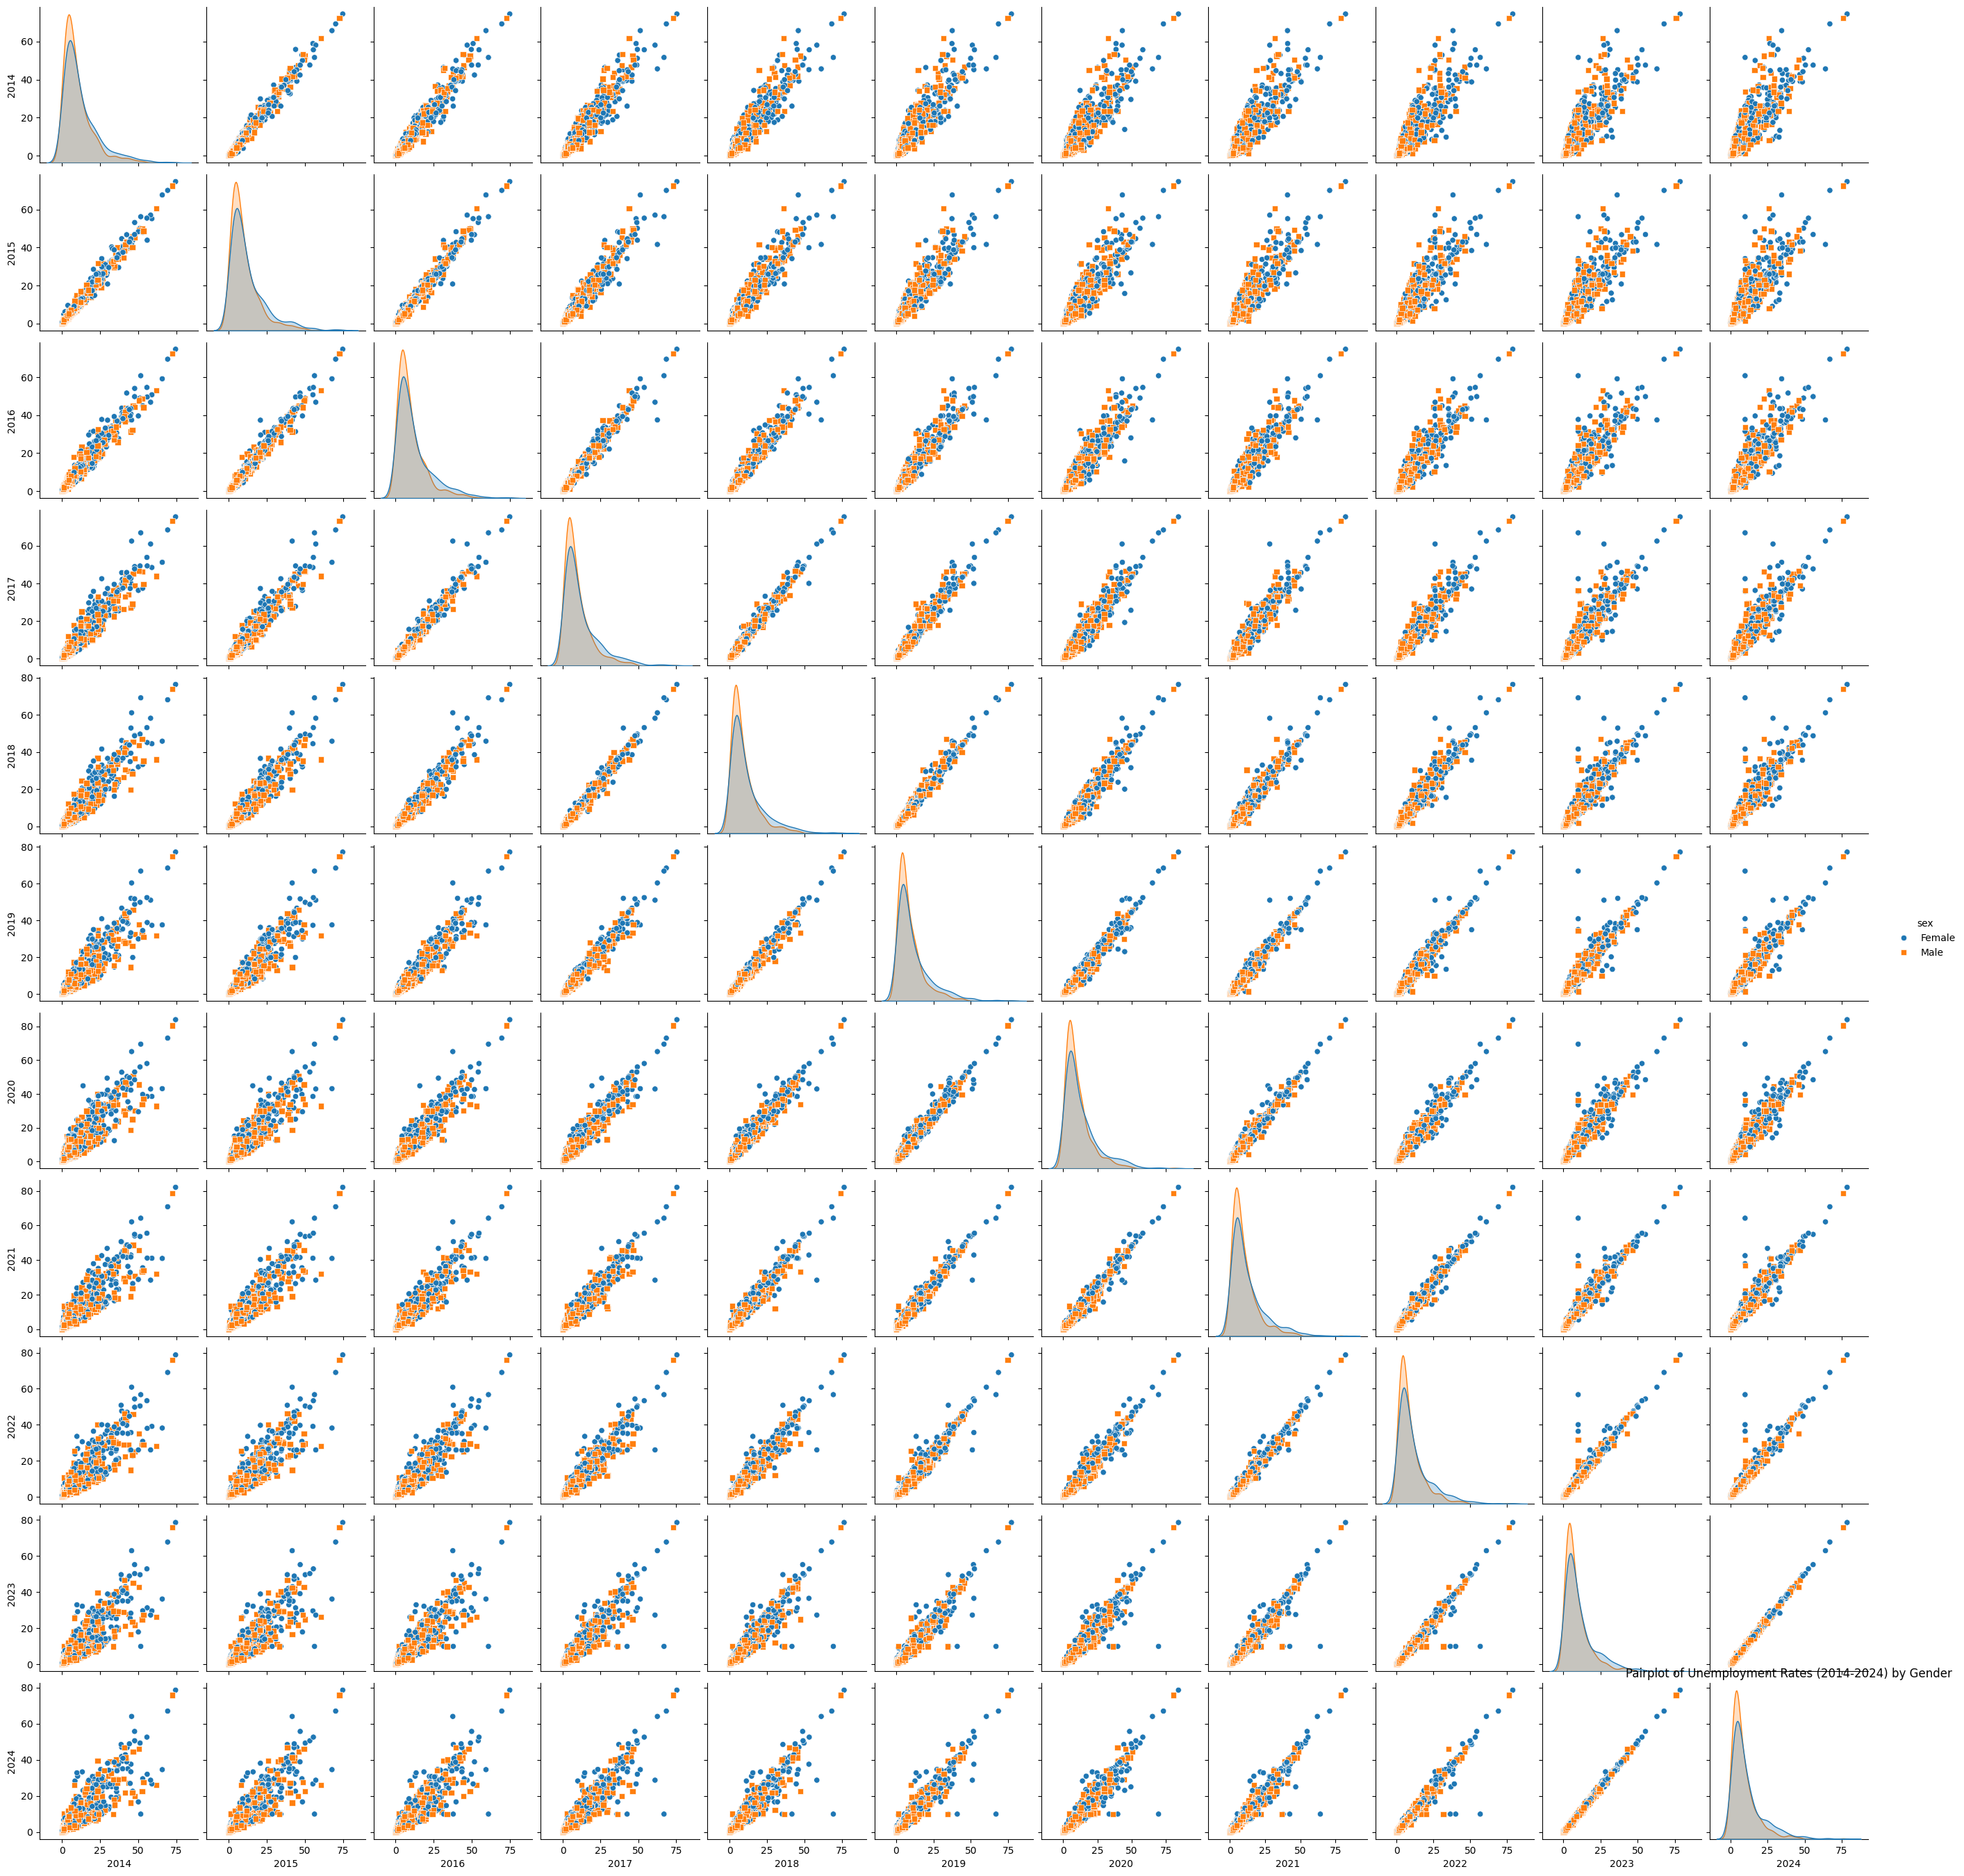

In [ ]:
sns.pairplot(df_ump, hue="sex", markers=["o", "s"])
plt.title('Pairplot of Unemployment Rates (2014-2024) by Gender')


<ipython-input-21-5ab8da8e5bb7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='2023', data=df_bar, palette='pastel')


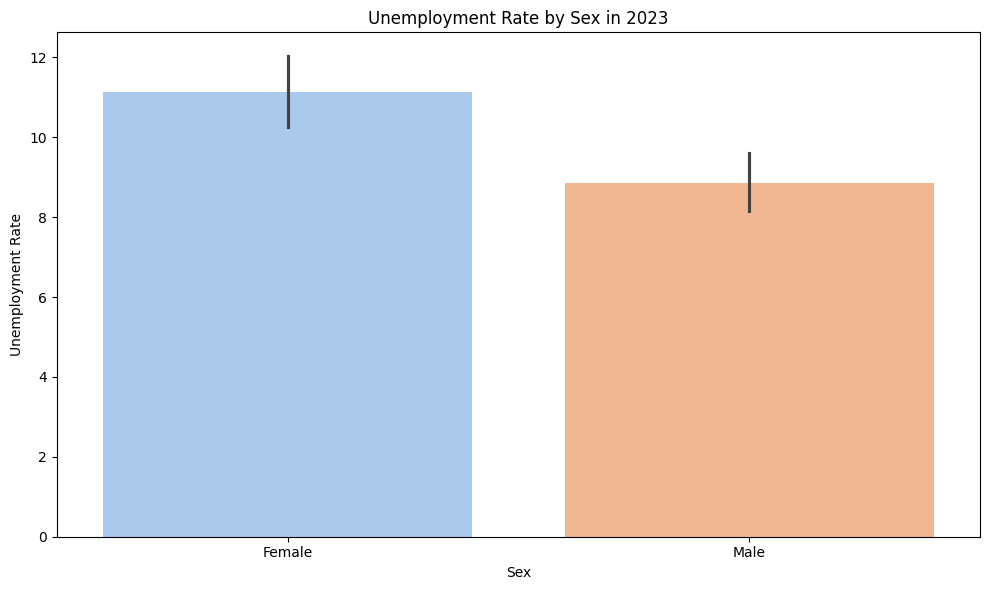

In [ ]:
cols_for_barplot = ['sex', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
df_bar = df_ump[cols_for_barplot]

plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='2023', data=df_bar, palette='pastel')
plt.title('Unemployment Rate by Sex in 2023')
plt.xlabel('Sex')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=0)
plt.tight_layout()


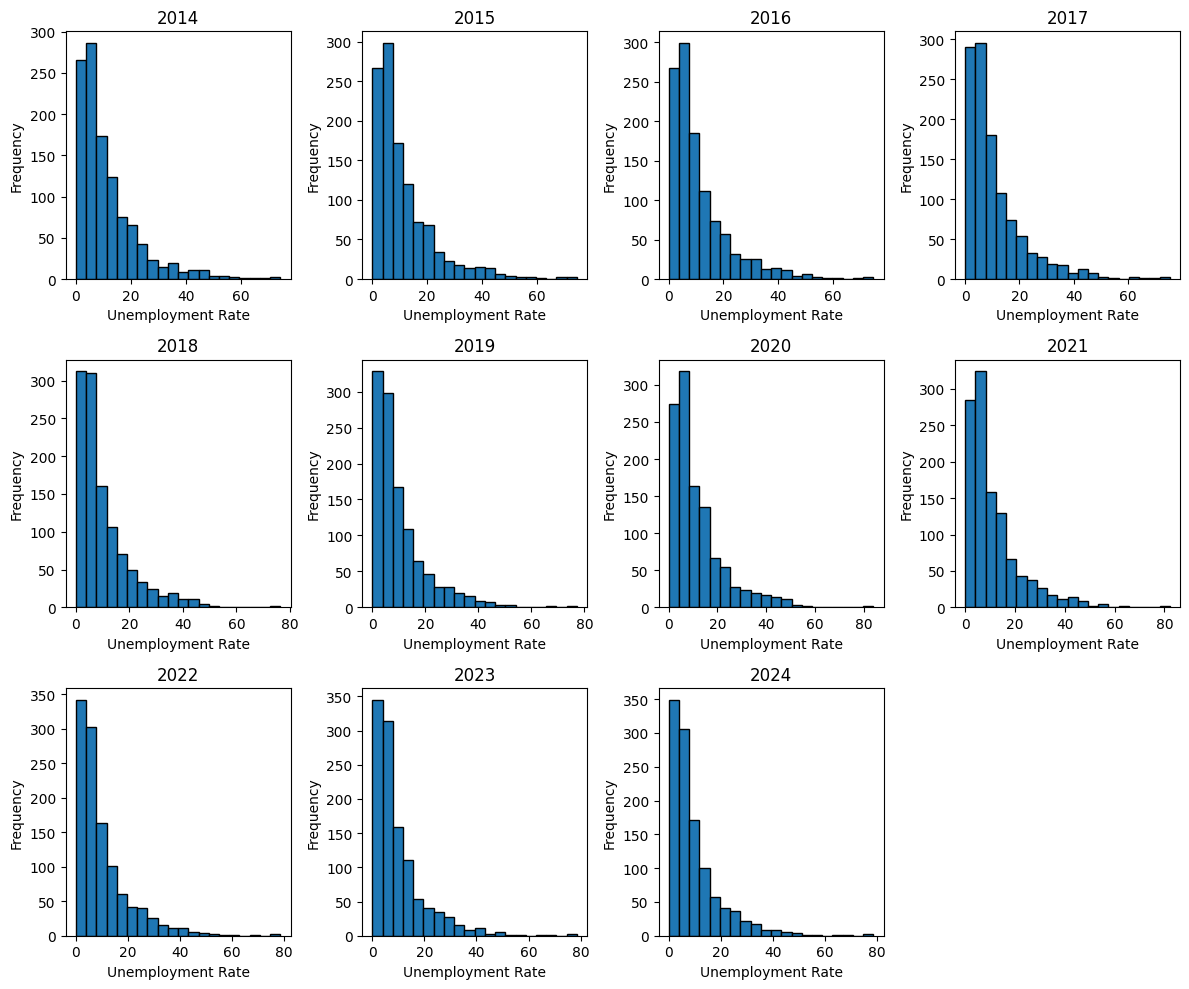

In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(req_col, 1):
    plt.subplot(3, 4, i)
    plt.hist(df_ump[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel('Unemployment Rate')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Example code for ARIMA forecasting (adjust parameters as needed)
model = ARIMA(df_ump['2020'], order=(5,1,0))
results = model.fit()
forecast = results.forecast(steps=12)  # Forecast next 12 periods


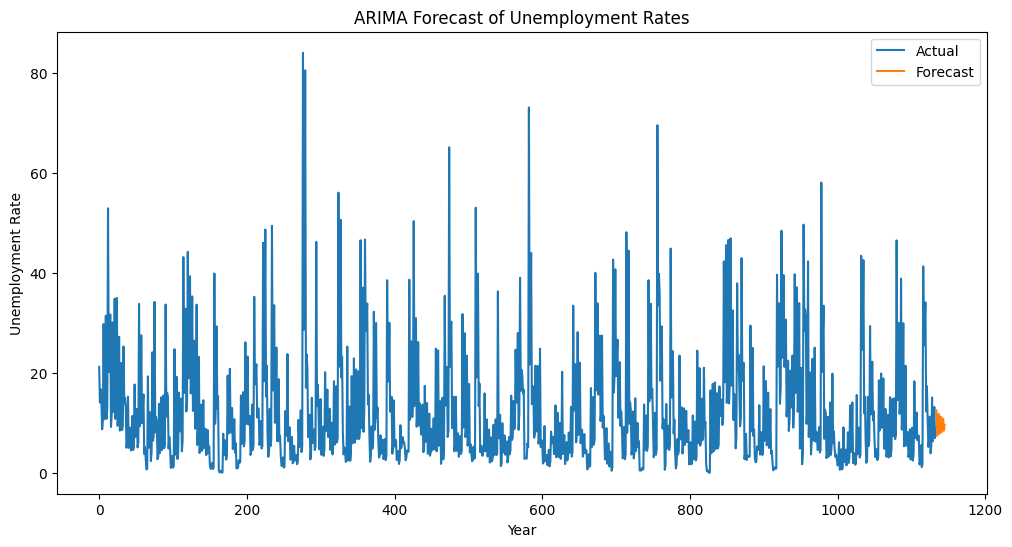

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_ump['2020'], label='Actual')
plt.plot(range(len(df_ump['2020']), len(df_ump['2020']) + len(forecast)), forecast, label='Forecast')
plt.title('ARIMA Forecast of Unemployment Rates')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()


<ipython-input-25-ba85eea724bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Unemployment Rate', data=melt_df, palette='viridis')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2019'),
  Text(1, 0, '2020'),
  Text(2, 0, '2021'),
  Text(3, 0, '2022'),
  Text(4, 0, '2023'),
  Text(5, 0, '2024')])

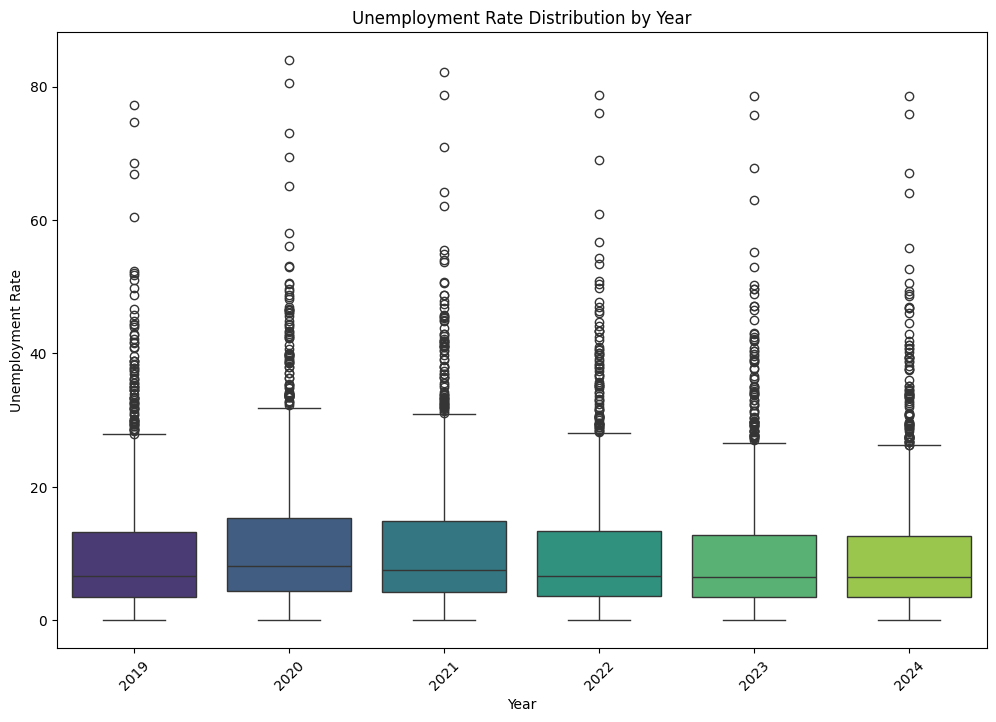

In [ ]:
melt_df = df_ch.melt(value_vars=df_ch.columns[5:], var_name='Year', value_name='Unemployment Rate')
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Unemployment Rate', data=melt_df, palette='viridis')
plt.title('Unemployment Rate Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)


In [ ]:
import plotly.express as px

import pandas as pd

df_long = df_ch.melt(id_vars=[], var_name='Year', value_name='Unemployment Rate')

# Create an interactive line plot with Plotly
fig = px.line(df_long, x='Year', y='Unemployment Rate', title='Interactive Unemployment Trends')
fig.update_layout(xaxis_title='Year', yaxis_title='Unemployment Rate')
fig.show()


# **5.Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

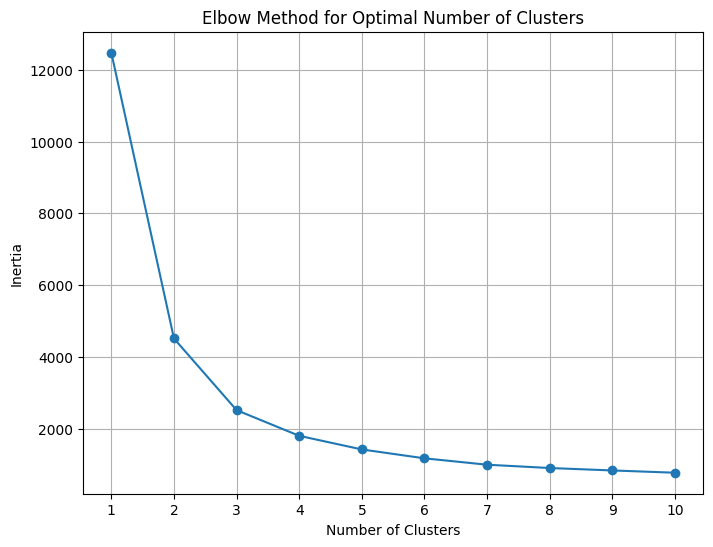

In [ ]:
features = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
df_clustering = df_ump[features]

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



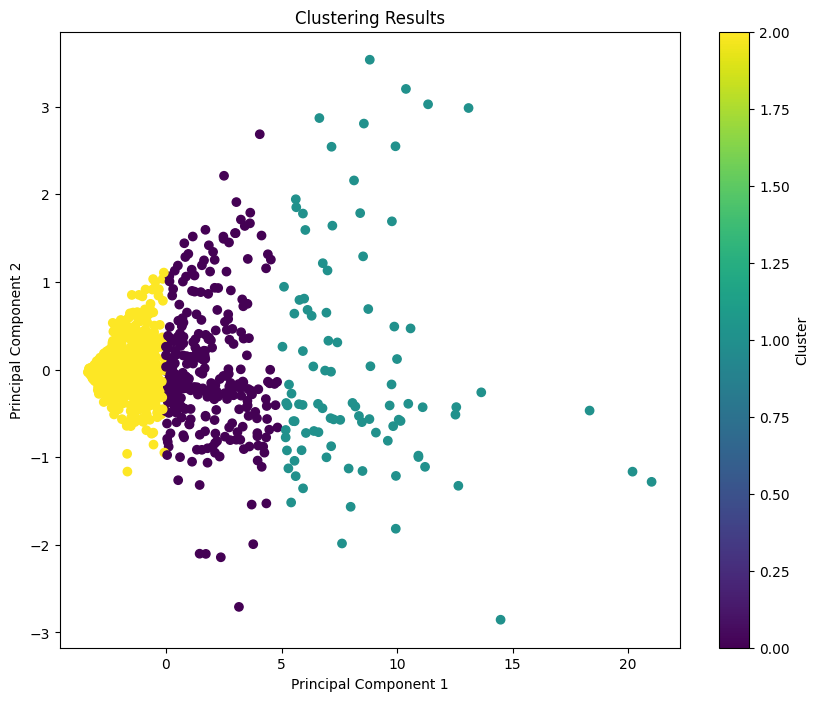

In [ ]:
k = 3  # Replace with the number of clusters chosen from the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame
df_ump['Cluster'] = clusters

# Visualize clustering results
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_ump['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')


In [ ]:
k = 3 # Replace with the number of clusters chosen from the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels and country names to the original DataFrame
df_ump['Cluster'] = clusters

# Show which country falls into which cluster
cluster_summary = df_ump[['country_name', 'Cluster']]
print(cluster_summary)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,country_name,Cluster
0,Afghanistan,3
1,Afghanistan,0
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0
...,...,...
1129,Zimbabwe,1
1130,Zimbabwe,1
1131,Zimbabwe,0
1132,Zimbabwe,1


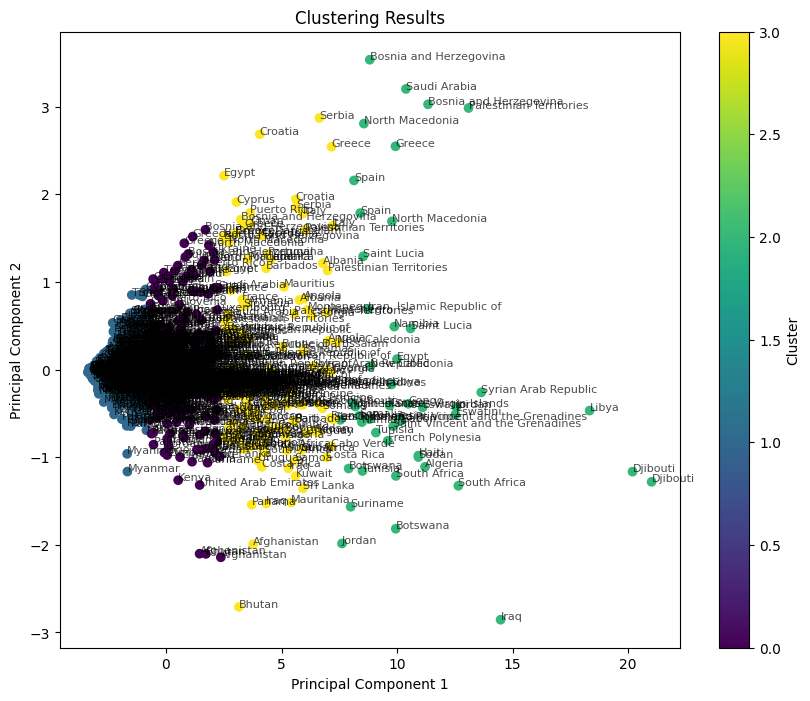

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_ump['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')

# Annotate each point with country names
for i, country in enumerate(df_ump['country_name']):
    plt.annotate(country, (df_pca[i, 0], df_pca[i, 1]), fontsize=8, alpha=0.7)



# **6. Deep Learning Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Check for missing values in the '2024' column
missing_values = df_ump['2024'].isna().sum()
print(f"Number of missing values in '2024' column: {missing_values}")

# Separate data with missing and non-missing '2024' values
train_data = df_ump[df_ump['2024'].notna()].copy()
predict_data = df_ump[df_ump['2024'].isna()].copy()

# Drop non-numerical columns for simplicity
numerical_columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
X_train = train_data[numerical_columns]
y_train = train_data['2024']

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

if not predict_data.empty:
    X_predict = scaler.transform(predict_data[numerical_columns])

# Define the deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)



Number of missing values in '2024' column: 12
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 162.4056 - val_loss: 93.2140
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.0108 - val_loss: 14.2130
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 16.4541 - val_loss: 5.0724
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.4284 - val_loss: 2.4494
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.4856 - val_loss: 4.0006
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.0052 - val_loss: 4.3591
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4352 - val_loss: 1.7427
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7068 - val_loss: 0.9850
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3416 - val_loss: 1.5616
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7894 - val_loss: 0.7535
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6389 - val_loss: 1.4270
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2511 - 

In [ ]:
# Predict missing values for 2024
if not predict_data.empty:
    predictions = model.predict(X_predict)
    predict_data['2024'] = predictions

# Combine the predicted data back into the original dataset
df_ump.update(predict_data)

print("Updated Data with Predicted 2024 Values:")
print(df_ump)
